<a href="https://colab.research.google.com/github/Ahmadsaidnouh/Term7-Artificial-Intelligence-Assignments/blob/main/lab4/jupyter%20notebooks/NLP_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
%pip install transformers
%pip install pandas 
%pip install torch
%pip install tqdm
%pip install nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
from transformers import BertTokenizer, BertModel
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapath = f"/content/drive/MyDrive/bonusData/IMDB Dataset.csv"
df = pd.read_csv(datapath)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


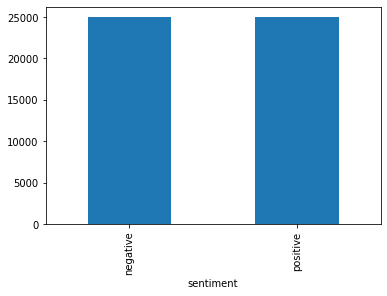

In [ ]:
df.groupby(["sentiment"]).size().plot.bar()

In [ ]:
stop_words = set(stopwords.words('english'))

temp = df['review']
i = 0
for sentence in temp:
  text=[]
  sentence = re.sub(r'[^\w\s]','',sentence).lower()
  sentence = nltk.word_tokenize(sentence)
  lemmatizer = WordNetLemmatizer()
  for word in sentence:
    if word not in stop_words:
      word = lemmatizer.lemmatize(word)
      word = word.lower()
      text.append(word)
  sentence = " ".join(text)
  temp[i] = sentence
  i += 1
df['review'] = temp
df

,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive
...,...,...
49995,thought movie right good job wasnt creative or...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,catholic taught parochial elementary school nu...,negative
49998,im going disagree previous comment side maltin...,negative


In [ ]:
g = df.groupby(["sentiment"])
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
negative, positive = g.iloc[: len(g) // 2], g[len(g) // 2 :]
negative

review sentiment
sentiment                                                                   
negative  0      cant believe steven segal career hit low reduc...  negative
          1      time machine start new york 1899 professor ale...  negative
          2      director know camera many option always always...  negative
          3      jeff speakman never really made beyond lowest ...  negative
          4      well sorry mistake one line summaryrun people ...  negative
...                                                            ...       ...
          24995  denzel thing right moviebr br maybe early stag...  negative
          24996  regret bought series expected action objective...  negative
          24997  everyone seen movie feel responsibility tell u...  negative
          24998  kid think weapon murderer wielded cool however...  negative
          24999  exciting fairly original series fox degraded m...  negative

[25000 rows x 2 columns]

In [ ]:
np.random.seed(112)
df_train_positive, df_val_positive, df_test_positive = np.split(
    positive.sample(frac=1, random_state=42),
    [int(0.7 * len(positive)), int(0.8 * len(positive))],
)

print(len(df_train_positive), len(df_val_positive), len(df_test_positive))


17500 2500 5000


In [ ]:
np.random.seed(112)
df_train_negative, df_val_negative, df_test_negative = np.split(
    negative.sample(frac=1, random_state=42),
    [int(0.7 * len(negative)), int(0.8 * len(negative))],
)

print(len(df_train_negative), len(df_val_negative), len(df_test_negative))


17500 2500 5000


In [ ]:
df_train = pd.concat([df_train_positive, df_train_negative])
df_val = pd.concat([df_val_positive, df_val_negative]).reset_index(drop=True)
df_test = pd.concat([df_test_positive, df_test_negative]).reset_index(drop=True)

print(len(df_train), len(df_val), len(df_test))
df_train


35000 5000 10000


review sentiment
sentiment                                                                   
positive  6868   like murder mystery busy definitely one see ch...  positive
          24016  went looking movie read tom clancys red storm ...  positive
          9668   fay grim true example call completed puzzle fi...  positive
          13640  irish origin loved movie guy hot funny also si...  positive
          14018  here another movie loaded satellite fired spac...  positive
...                                                            ...       ...
negative  9730   want see retarded homosexual karate expert bea...  negative
          21746  maybe subject good put script fails pace maybe...  negative
          21454  great war break daddy brave pilot go carry uns...  negative
          7734   rated movie 3 generous scenery ponderous gaudy...  negative
          885    saw 1245 show last night wouldve walked 20 min...  negative

[35000 rows x 2 columns]

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_val = df_val.sample(frac=1).reset_index(drop=True)

print(len(df_train), len(df_val), len(df_test))
df_train


35000 5000 10000


,review,sentiment
0,ive seen 3 cant believe bad naqoyqatsi compari...,negative
1,world told harrison ford good role himbr br jo...,negative
2,kinda surprised pg rating back dvd case certai...,positive
3,bela lugosi great usual movie nothing compared...,negative
4,short subject remake three stooge 1942 film wh...,negative
...,...,...
34995,great late night movie mean truly enjoyed play...,positive
34996,film belonging film noir genre usually contain...,positive
34997,total crapbr br kind excited see film version ...,negative
34998,scripting subtle comedy unmatched movie recent...,positive


In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
labels = {
    "negative": 0,
    "positive": 1,
}


class Dataset(torch.utils.data.Dataset):
    def __init__(self, df):

        self.labels = [labels[label] for label in df["sentiment"]]
        self.texts = [
            tokenizer(
                text,
                padding="max_length",
                max_length=512,
                truncation=True,
                return_tensors="pt",
            )
            for text in df["review"]
        ]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y


Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class BertClassifier(nn.Module):
    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout_bert = nn.Dropout(0.5)
        self.dropout = nn.Dropout(0.2)
        self.linear1 = nn.Linear(768, 512)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.linear2 = nn.Linear(512, 256)
        self.batchnorm2 = nn.BatchNorm1d(256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4 = nn.Linear(128, 64)
        self.linear_out = nn.Linear(64, 1)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()
        self.relu3 = nn.ReLU()
        self.relu4 = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_id, mask):
        _, x = self.bert(input_ids=input_id, attention_mask=mask,return_dict=False)
        x = self.dropout_bert(x)
        x = self.relu1(self.linear1(x))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.relu2(self.linear2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.relu3(self.linear3(x))
        x = self.dropout(x)
        x = self.relu4(self.linear4(x))
        x = self.dropout(x)
        x = self.sigmoid(self.linear_out(x))
        return x


In [ ]:
def save_checkpoint(model, epoch, optimizer, best_acc, model_path):
  state = {
      'epoch' : epoch + 1,
      'model' : model.state_dict(),
      'best accuracy' : best_acc,
      'optimizer' : optimizer.state_dict()
  }
  torch.save(state, model_path)

In [ ]:
batch_size=16
train, val, test = Dataset(df_train), Dataset(df_val), Dataset(df_test)
train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test, batch_size=batch_size)

In [ ]:
epoch_list = list()
train_loss = list()
val_loss = list()
train_accuracy = list()
val_accuracy = list()

# def train(model, train_data, val_data, learning_rate, epochs, bach_size, device):
def train(model,train_data, val_data, train_dataloader, val_dataloader, learning_rate, epochs, bach_size, best_model_path, last_model_path):
                                  
    # Early stopping
    the_last_loss = 100
    patience = 2
    trigger_times = 0
    val_acc_best = 0

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)
                output = model(input_id, mask)

                batch_loss = criterion(output.squeeze(1), train_label.float())
                total_loss_train += batch_loss.item()

                y_pred_tag = torch.round(output.squeeze(1))
                acc = (y_pred_tag == train_label).sum()

                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output.squeeze(1), val_label.float())
                    total_loss_val += batch_loss.item()
                    
                    y_pred_tag = torch.round(output.squeeze(1))
                    acc = (y_pred_tag == val_label).sum()
                    total_acc_val += acc
            
            train_loss.append(total_loss_train / len(train_data))
            train_accuracy.append(total_acc_train.item() / len(train_data))
            val_loss.append(total_loss_val / len(val_data))
            val_accuracy.append(total_acc_val.item() / len(val_data))
            epoch_list.append(epoch_num+1)
            val_acc_new = total_acc_val / len(val_data)
            
            
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
            
            
            if val_acc_new > val_acc_best:
              val_acc_best = val_acc_new
              save_checkpoint(model, epoch_num, optimizer, val_acc_best, best_model_path)

            save_checkpoint(model, epoch_num, optimizer, val_acc_best, last_model_path)
            # Early stopping
            the_current_loss = total_loss_val / len(val_data)
            if the_current_loss > the_last_loss:
                trigger_times += 1
 
                if trigger_times >= patience:
                    print(trigger_times, patience)
                    print('Early stopping!\nStart to test process.')
                    # break
 
            else:
              trigger_times = 0

            the_last_loss = the_current_loss


            
            
                  

In [ ]:
EPOCHS = 5
model = BertClassifier()
LR = 1e-4
bach_size=16
best_model_path = f"/content/drive/MyDrive/saved models/model_best_checkpoint.pth.tar"
last_model_path = f"/content/drive/MyDrive/saved models/model_last_checkpoint.pth.tar"

train(model, df_train, df_val, train_dataloader, val_dataloader, LR, EPOCHS,bach_size, best_model_path, last_model_path)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 2188/2188 [50:20<00:00,  1.38s/it]


Epochs: 1 | Train Loss:  0.043                 | Train Accuracy:  0.501                 | Val Loss:  0.043                 | Val Accuracy:  0.506


100%|██████████| 2188/2188 [50:15<00:00,  1.38s/it]


Epochs: 2 | Train Loss:  0.043                 | Train Accuracy:  0.505                 | Val Loss:  0.043                 | Val Accuracy:  0.486


 87%|████████▋ | 1905/2188 [43:44<06:29,  1.38s/it]

In [ ]:

plt.figure(figsize = [18, 5])
plt.suptitle("Loss and Accuracy in training")
plt.subplot(1,2,1)
plt.plot(epoch_list,train_loss);
plt.plot(epoch_list,val_loss);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"])
plt.subplot(1,2,2)
plt.plot(epoch_list,train_accuracy);
plt.plot(epoch_list,val_accuracy);
plt.xlabel("Epochs");
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"]);

In [ ]:
def evaluate(model, test_data, test_dataloader):

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    final_confusion_matrix = np.zeros([2,2])

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)
              output = model(input_id, mask)
              y_pred_tag = torch.round(output.squeeze(1))
              acc = (y_pred_tag == test_label).sum()
              total_acc_test += acc
              final_confusion_matrix += confusion_matrix(test_label.cpu().data.numpy(), y_pred_tag.cpu().data.numpy())
    
    TP = final_confusion_matrix[0][0]
    FP = final_confusion_matrix[0][1]
    FN = final_confusion_matrix[1][0]
    TN = final_confusion_matrix[1][1]
    Percision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    print(f'Percision : {Percision}')
    print(f'Sensitivity (Recall) : {Recall}')
    print(f'Specifity : {TN/(TN+FP)}')
    print(f'F1 Score = {((2*Percision*Recall)/(Percision+Recall))}')
    print('Confusion Matrix :')
    print(final_confusion_matrix)
    


In [ ]:
loaded_checkpoint = torch.load(best_model_path)
model = BertClassifier()
model.load_state_dist(loaded_checkpoint["model"])


evaluate(model, df_test, test_dataloader)